In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.initializers import RandomNormal
from __future__ import division


In [0]:

# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [9]:
print("Shape of training data is {0}".format(x_train.shape))
print("Shape of test data is {0}".format(x_test.shape)) #28 * 28 represents image

Shape of training data is (60000, 28, 28)
Shape of test data is (10000, 28, 28)


In [10]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

print("Shape after flatenning a matrix into 784d vector is {0}".format(x_train.shape))
print("Shape after flatenning a matrix into 784d vector is {0}".format(x_test.shape))

Shape after flatenning a matrix into 784d vector is (60000, 784)
Shape after flatenning a matrix into 784d vector is (10000, 784)


In [11]:
print(x_train[100])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   2  18  46 136 136 244 255 241 103   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  15  94 163 253 253 253 253 238 218
 204  35   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 131 253 253 253 253 237 200  57   0   0   0   

In [0]:
#Normailzing x_train and x_test.
#The maximum value of pixel is 255 and minimum value is 0

x_train=(x_train)/255
x_test=(x_test)/255

In [13]:
#After Normalization
print(x_train[100])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [14]:
#Converting output labels into one hot encoded vector
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


Label for 10th data point is 3


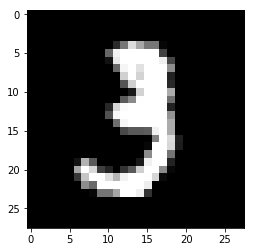

In [15]:
#plotting an image from a matrix
import matplotlib.pyplot as plt
%matplotlib inline
print("Label for 10th data point is {0}".format(np.argmax(y_train[10])))
plt.imshow(x_train[10].reshape(28,28),cmap='gray')
plt.show()

In [0]:
#Building 2 layer Perceptron

from keras.models import Sequential
from keras.layers import Dense,Activation

In [0]:
output_dim = 10
input_dim = x_train.shape[1]

batch_size = 128
nb_epoch = 25

Building 2 Layer MLP with Bacth Normalization and Dropout

---



In [0]:
#Building a model
#Designing the Architecture of Neural Network
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras.initializers import he_normal

model_2=Sequential()
model_2.add(Dense(374, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))

model_2.add(Dense(50, activation='relu', kernel_initializer=he_normal(seed=None)))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))
            
model_2.add(Dense(output_dim, activation='softmax'))
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 374)               293590    
_________________________________________________________________
batch_normalization_6 (Batch (None, 374)               1496      
_________________________________________________________________
dropout_6 (Dropout)          (None, 374)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 50)                18750     
_________________________________________________________________
batch_normalization_7 (Batch (None, 50)                200       
_________________________________________________________________
dropout_7 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                510       
Total para

In [0]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_2.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 6s 102us/step - loss: 0.5467 - acc: 0.8373 - val_loss: 0.1704 - val_acc: 0.9469
Epoch 2/25
60000/60000 [==============================] - 5s 82us/step - loss: 0.2605 - acc: 0.9257 - val_loss: 0.1257 - val_acc: 0.9592
Epoch 3/25
60000/60000 [==============================] - 5s 83us/step - loss: 0.2073 - acc: 0.9408 - val_loss: 0.1098 - val_acc: 0.9673
Epoch 4/25
60000/60000 [==============================] - 5s 81us/step - loss: 0.1757 - acc: 0.9490 - val_loss: 0.0915 - val_acc: 0.9725
Epoch 5/25
60000/60000 [==============================] - 5s 81us/step - loss: 0.1540 - acc: 0.9550 - val_loss: 0.0837 - val_acc: 0.9728
Epoch 6/25
60000/60000 [==============================] - 5s 83us/step - loss: 0.1384 - acc: 0.9595 - val_loss: 0.0884 - val_acc: 0.9725
Epoch 7/25
60000/60000 [==============================] - 5s 81us/step - loss: 0.1319 - acc: 0.9618 - val_loss: 0.0759 - val_ac

Test score: 0.06540877195581561
Test accuracy: 0.983


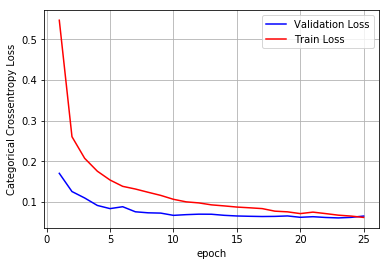

In [0]:
score = model_2.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

#Training loss
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [26]:
#Building a model
#Designing the Architecture of Neural Network
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras.initializers import he_normal

model_2_dr=Sequential()
model_2_dr.add(Dense(374, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_2_dr.add(BatchNormalization())
model_2_dr.add(Dropout(0.2))

model_2_dr.add(Dense(50, activation='relu', kernel_initializer=he_normal(seed=None)))
model_2_dr.add(BatchNormalization())
model_2_dr.add(Dropout(0.2))
            
model_2_dr.add(Dense(output_dim, activation='softmax'))
model_2_dr.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 374)               293590    
_________________________________________________________________
batch_normalization_10 (Batc (None, 374)               1496      
_________________________________________________________________
dropout_10 (Dropout)         (None, 374)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)                18750     
_________________________________________________________________
batch_normalization_11 (Batc (None, 50)                200       
_________________________________________________________________
dropout_11 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                510       
Total para

In [27]:
model_2_dr.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_2_dr.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 8s 139us/step - loss: 0.3062 - acc: 0.9116 - val_loss: 0.1234 - val_acc: 0.9619
Epoch 2/25
60000/60000 [==============================] - 7s 121us/step - loss: 0.1336 - acc: 0.9604 - val_loss: 0.0867 - val_acc: 0.9723
Epoch 3/25
60000/60000 [==============================] - 7s 117us/step - loss: 0.0995 - acc: 0.9698 - val_loss: 0.0801 - val_acc: 0.9744
Epoch 4/25
60000/60000 [==============================] - 7s 119us/step - loss: 0.0806 - acc: 0.9752 - val_loss: 0.0710 - val_acc: 0.9790
Epoch 5/25
60000/60000 [==============================] - 7s 119us/step - loss: 0.0662 - acc: 0.9799 - val_loss: 0.0692 - val_acc: 0.9779
Epoch 6/25
60000/60000 [==============================] - 7s 121us/step - loss: 0.0604 - acc: 0.9809 - val_loss: 0.0647 - val_acc: 0.9785
Epoch 7/25
60000/60000 [==============================] - 7s 122us/step - loss: 0.0532 - acc: 0.9826 - val_loss: 0.0657 - 

Test score: 0.05975274081545213
Test accuracy: 0.9838


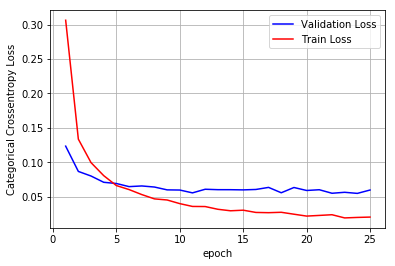

In [29]:
score = model_2_dr.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

#Training loss
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
#Without Dropout and BatchNormalization
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras.initializers import he_normal

model_2_we=Sequential()
model_2_we.add(Dense(374, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))

model_2_we.add(Dense(50, activation='relu',kernel_initializer=he_normal(seed=None)))
            
model_2_we.add(Dense(output_dim, activation='softmax'))
model_2_we.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 374)               293590    
_________________________________________________________________
dense_16 (Dense)             (None, 50)                18750     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                510       
Total params: 312,850
Trainable params: 312,850
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_2_we.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_2_we.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 5s 82us/step - loss: 0.2745 - acc: 0.9214 - val_loss: 0.1304 - val_acc: 0.9612
Epoch 2/25
60000/60000 [==============================] - 4s 67us/step - loss: 0.1058 - acc: 0.9687 - val_loss: 0.0907 - val_acc: 0.9719
Epoch 3/25
60000/60000 [==============================] - 4s 66us/step - loss: 0.0692 - acc: 0.9790 - val_loss: 0.0791 - val_acc: 0.9742
Epoch 4/25
60000/60000 [==============================] - 4s 65us/step - loss: 0.0485 - acc: 0.9846 - val_loss: 0.0755 - val_acc: 0.9775
Epoch 5/25
60000/60000 [==============================] - 4s 63us/step - loss: 0.0353 - acc: 0.9895 - val_loss: 0.0698 - val_acc: 0.9784
Epoch 6/25
60000/60000 [==============================] - 4s 65us/step - loss: 0.0274 - acc: 0.9913 - val_loss: 0.0698 - val_acc: 0.9793
Epoch 7/25
60000/60000 [==============================] - 4s 66us/step - loss: 0.0183 - acc: 0.9946 - val_loss: 0.0663 - val_acc

Test score: 0.08522433322680553
Test accuracy: 0.982


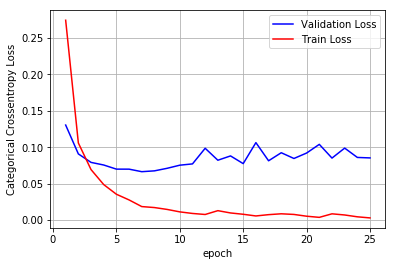

In [0]:
score = model_2_we.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

#Training loss
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
#Building a model
#Designing the Architecture of Neural Network
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras.initializers import he_normal

model_3=Sequential()
model_3.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))

model_3.add(Dense(64, activation='relu', kernel_initializer=he_normal(seed=None)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))

model_3.add(Dense(32, activation='relu', kernel_initializer=he_normal(seed=None)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))

model_3.add(Dense(output_dim, activation='softmax'))
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_8 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                16448     
_________________________________________________________________
batch_normalization_9 (Batch (None, 64)                256       
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 32)                2080      
__________

In [0]:
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_3 = model_3.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 6s 100us/step - loss: 1.0184 - acc: 0.6800 - val_loss: 0.2643 - val_acc: 0.9241
Epoch 2/25
60000/60000 [==============================] - 4s 71us/step - loss: 0.4749 - acc: 0.8680 - val_loss: 0.1767 - val_acc: 0.9487
Epoch 3/25
60000/60000 [==============================] - 4s 72us/step - loss: 0.3527 - acc: 0.9053 - val_loss: 0.1424 - val_acc: 0.9596
Epoch 4/25
60000/60000 [==============================] - 4s 72us/step - loss: 0.2996 - acc: 0.9223 - val_loss: 0.1294 - val_acc: 0.9636
Epoch 5/25
60000/60000 [==============================] - 4s 74us/step - loss: 0.2606 - acc: 0.9326 - val_loss: 0.1155 - val_acc: 0.9680
Epoch 6/25
60000/60000 [==============================] - 4s 73us/step - loss: 0.2350 - acc: 0.9397 - val_loss: 0.1088 - val_acc: 0.9699
Epoch 7/25
60000/60000 [==============================] - 4s 69us/step - loss: 0.2198 - acc: 0.9440 - val_loss: 0.1039 - val_ac

Test score: 0.07612645023153164
Test accuracy: 0.9806


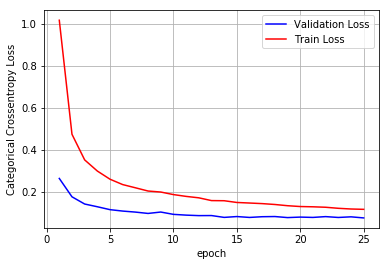

In [0]:
score = model_3.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

#Training loss
vy = history_3.history['val_loss']
ty = history_3.history['loss']
plt_dynamic(x, vy, ty, ax)

In [22]:
#Dropout rate=0.2

from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras.initializers import he_normal

model_3_dr=Sequential()
model_3_dr.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_3_dr.add(BatchNormalization())
model_3_dr.add(Dropout(0.2))

model_3_dr.add(Dense(64, activation='relu', kernel_initializer=he_normal(seed=None)))
model_3_dr.add(BatchNormalization())
model_3_dr.add(Dropout(0.2))

model_3_dr.add(Dense(32, activation='relu', kernel_initializer=he_normal(seed=None)))
model_3_dr.add(BatchNormalization())
model_3_dr.add(Dropout(0.2))

model_3_dr.add(Dense(output_dim, activation='softmax'))
model_3_dr.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               200960    
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                16448     
_________________________________________________________________
batch_normalization_8 (Batch (None, 64)                256       
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
__________

In [23]:
model_3_dr.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_3 = model_3_dr.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 8s 137us/step - loss: 0.4607 - acc: 0.8699 - val_loss: 0.1439 - val_acc: 0.9562
Epoch 2/25
60000/60000 [==============================] - 6s 106us/step - loss: 0.1816 - acc: 0.9479 - val_loss: 0.1046 - val_acc: 0.9689
Epoch 3/25
60000/60000 [==============================] - 6s 104us/step - loss: 0.1406 - acc: 0.9583 - val_loss: 0.0933 - val_acc: 0.9700
Epoch 4/25
60000/60000 [==============================] - 6s 106us/step - loss: 0.1156 - acc: 0.9657 - val_loss: 0.0903 - val_acc: 0.9710
Epoch 5/25
60000/60000 [==============================] - 6s 107us/step - loss: 0.1004 - acc: 0.9709 - val_loss: 0.0821 - val_acc: 0.9746
Epoch 6/25
60000/60000 [==============================] - 6s 107us/step - loss: 0.0877 - acc: 0.9741 - val_loss: 0.0766 - val_acc: 0.9762
Epoch 7/25
60000/60000 [==============================] - 6s 103us/step - 

Test score: 0.06336924908877117
Test accuracy: 0.9839


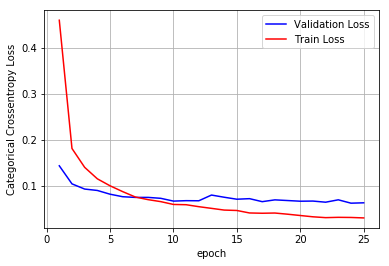

In [25]:
score = model_3_dr.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

#Training loss
vy = history_3.history['val_loss']
ty = history_3.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras.initializers import he_normal

model_3_we=Sequential()
model_3_we.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))

model_3_we.add(Dense(64, activation='relu', kernel_initializer=he_normal(seed=None)))

model_3_we.add(Dense(32, activation='relu', kernel_initializer=he_normal(seed=None)))


        
model_3_we.add(Dense(output_dim, activation='softmax'))
model_3_we.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_23 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_24 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_25 (Dense)             (None, 10)                330       
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_3_we.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_3_we = model_3_we.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 5s 78us/step - loss: 0.3040 - acc: 0.9103 - val_loss: 0.1337 - val_acc: 0.9619
Epoch 2/25
60000/60000 [==============================] - 3s 54us/step - loss: 0.1126 - acc: 0.9660 - val_loss: 0.0952 - val_acc: 0.9692
Epoch 3/25
60000/60000 [==============================] - 3s 53us/step - loss: 0.0725 - acc: 0.9775 - val_loss: 0.0905 - val_acc: 0.9726
Epoch 4/25
60000/60000 [==============================] - 3s 52us/step - loss: 0.0531 - acc: 0.9839 - val_loss: 0.0741 - val_acc: 0.9783
Epoch 5/25
60000/60000 [==============================] - 3s 54us/step - loss: 0.0401 - acc: 0.9876 - val_loss: 0.0825 - val_acc: 0.9761
Epoch 6/25
60000/60000 [==============================] - 3s 55us/step - loss: 0.0304 - acc: 0.9906 - val_loss: 0.0901 - val_acc: 0.9741
Epoch 7/25
60000/60000 [==============================] - 3s 55us/step - loss: 0.0256 - acc: 0.9918 - val_loss: 0.0788 - val_acc

Test score: 0.10719894685190826
Test accuracy: 0.9799


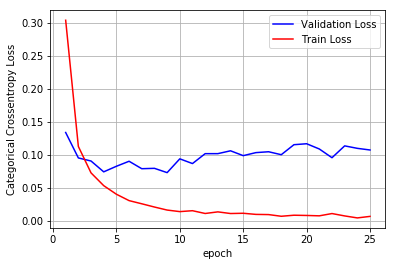

In [0]:
score = model_3_we.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

#Training loss
vy = history_3_we.history['val_loss']
ty = history_3_we.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
#Building a model
#Designing the Architecture of Neural Network
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras.initializers import he_normal

model_5=Sequential()
model_5.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.5))

model_5.add(Dense(256, activation='relu',kernel_initializer=he_normal(seed=None)))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.5))


model_5.add(Dense(64, activation='relu', kernel_initializer=he_normal(seed=None)))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.5))

model_5.add(Dense(32, activation='relu', kernel_initializer=he_normal(seed=None)))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.5))

model_5.add(Dense(16, activation='relu', kernel_initializer=he_normal(seed=None)))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.5))
        
model_5.add(Dense(output_dim, activation='softmax'))
model_5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_11 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_12 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 64)                16448     
__________

In [0]:
model_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_5 = model_5.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 12s 194us/step - loss: 1.7465 - acc: 0.3925 - val_loss: 0.6385 - val_acc: 0.8838
Epoch 2/25
60000/60000 [==============================] - 9s 155us/step - loss: 0.9926 - acc: 0.6653 - val_loss: 0.3366 - val_acc: 0.9172
Epoch 3/25
60000/60000 [==============================] - 9s 157us/step - loss: 0.7279 - acc: 0.7703 - val_loss: 0.2217 - val_acc: 0.9459
Epoch 4/25
60000/60000 [==============================] - 9s 153us/step - loss: 0.5828 - acc: 0.8243 - val_loss: 0.1745 - val_acc: 0.9561
Epoch 5/25
60000/60000 [==============================] - 10s 158us/step - loss: 0.5156 - acc: 0.8506 - val_loss: 0.1464 - val_acc: 0.9635
Epoch 6/25
60000/60000 [==============================] - 9s 155us/step - loss: 0.4516 - acc: 0.8709 - val_loss: 0.1358 - val_acc: 0.9666
Epoch 7/25
60000/60000 [==============================] - 9s 153us/step - loss: 0.4233 - acc: 0.8830 - val_loss: 0.1328 

Test score: 0.09329995909105054
Test accuracy: 0.982


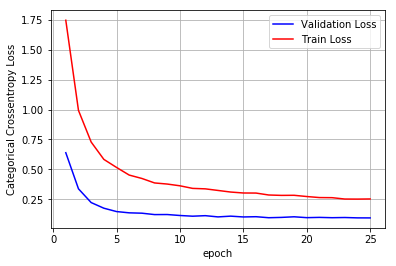

In [0]:
score = model_5.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

#Training loss
vy = history_5.history['val_loss']
ty = history_5.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
#Building a model
#Designing the Architecture of Neural Network
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras.initializers import he_normal

model_5_we=Sequential()
model_5_we.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))

model_5_we.add(Dense(256, activation='relu',kernel_initializer=he_normal(seed=None)))


model_5_we.add(Dense(64, activation='relu', kernel_initializer=he_normal(seed=None)))

model_5_we.add(Dense(32, activation='relu', kernel_initializer=he_normal(seed=None)))

model_5_we.add(Dense(16, activation='relu', kernel_initializer=he_normal(seed=None)))
        
model_5_we.add(Dense(output_dim, activation='softmax'))
model_5_we.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_33 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_34 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_35 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_36 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_37 (Dense)             (None, 10)                170       
Total params: 552,474
Trainable params: 552,474
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_5_we.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_5_we = model_5_we.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 9s 142us/step - loss: 0.3275 - acc: 0.9002 - val_loss: 0.1544 - val_acc: 0.9552
Epoch 2/25
60000/60000 [==============================] - 7s 110us/step - loss: 0.1067 - acc: 0.9687 - val_loss: 0.0987 - val_acc: 0.9708
Epoch 3/25
60000/60000 [==============================] - 7s 111us/step - loss: 0.0678 - acc: 0.9795 - val_loss: 0.1008 - val_acc: 0.9696
Epoch 4/25
60000/60000 [==============================] - 7s 113us/step - loss: 0.0477 - acc: 0.9856 - val_loss: 0.0813 - val_acc: 0.9761
Epoch 5/25
60000/60000 [==============================] - 7s 114us/step - loss: 0.0366 - acc: 0.9886 - val_loss: 0.0919 - val_acc: 0.9749
Epoch 6/25
60000/60000 [==============================] - 7s 114us/step - loss: 0.0317 - acc: 0.9899 - val_loss: 0.0749 - val_acc: 0.9787
Epoch 7/25
60000/60000 [==============================] - 7s 117us/step - loss: 0.0254 - acc: 0.9919 - val_loss: 0.0803 - 

Test score: 0.11090268665388713
Test accuracy: 0.9795


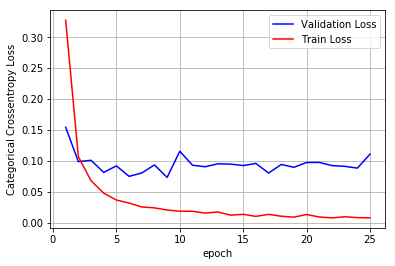

In [0]:
score = model_5_we.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

#Training loss
vy = history_5_we.history['val_loss']
ty = history_5_we.history['loss']
plt_dynamic(x, vy, ty, ax)

In [33]:
#Dropout rate=0.2

#Building a model
#Designing the Architecture of Neural Network
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras.initializers import he_normal

model_5_dr=Sequential()
model_5_dr.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_5_dr.add(BatchNormalization())
model_5_dr.add(Dropout(0.2))

model_5_dr.add(Dense(256, activation='relu',kernel_initializer=he_normal(seed=None)))
model_5_dr.add(BatchNormalization())
model_5_dr.add(Dropout(0.2))


model_5_dr.add(Dense(64, activation='relu', kernel_initializer=he_normal(seed=None)))
model_5_dr.add(BatchNormalization())
model_5_dr.add(Dropout(0.2))

model_5_dr.add(Dense(32, activation='relu', kernel_initializer=he_normal(seed=None)))
model_5_dr.add(BatchNormalization())
model_5_dr.add(Dropout(0.2))

model_5_dr.add(Dense(16, activation='relu', kernel_initializer=he_normal(seed=None)))
model_5_dr.add(BatchNormalization())
model_5_dr.add(Dropout(0.2))
        
model_5_dr.add(Dense(output_dim, activation='softmax'))
model_5_dr.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_22 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_22 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_23 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_23 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 64)                16448     
__________

In [34]:
model_5_dr.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_5 = model_5_dr.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 15s 244us/step - loss: 0.6715 - acc: 0.8169 - val_loss: 0.1674 - val_acc: 0.9559
Epoch 2/25
60000/60000 [==============================] - 11s 192us/step - loss: 0.2447 - acc: 0.9405 - val_loss: 0.1167 - val_acc: 0.9687
Epoch 3/25
60000/60000 [==============================] - 11s 190us/step - loss: 0.1804 - acc: 0.9563 - val_loss: 0.1014 - val_acc: 0.9732
Epoch 4/25
60000/60000 [==============================] - 11s 190us/step - loss: 0.1492 - acc: 0.9630 - val_loss: 0.0872 - val_acc: 0.9772
Epoch 5/25
60000/60000 [==============================] - 11s 190us/step - loss: 0.1229 - acc: 0.9689 - val_loss: 0.0893 - val_acc: 0.9763
Epoch 6/25
60000/60000 [==============================] - 11s 189us/step - loss: 0.1085 - acc: 0.9729 - val_loss: 0.0957 - val_acc: 0.9758
Epoch 7/25
60000/60000 [==============================] - 11s 192us/step - loss: 0.0944 - acc: 0.9757 - val_loss: 0.

Test score: 0.07617138812056509
Test accuracy: 0.9843


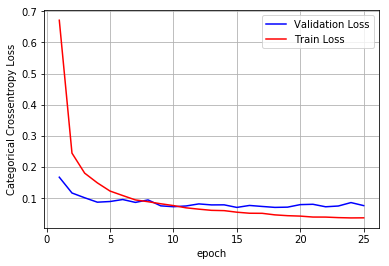

In [35]:
score = model_5_dr.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

#Training loss
vy = history_5.history['val_loss']
ty = history_5.history['loss']
plt_dynamic(x, vy, ty, ax)

In [36]:
from prettytable import PrettyTable

x=PrettyTable()
x.field_names=(["Name","Test Loss","Droupout-rate","Test Accuracy"])
x.add_row(["MLP(2 layers) with BN and dropout",0.065,0.5,98.3])
x.add_row(["MLP(2 layers) with BN and dropout",0.0597,0.2,98.38])
x.add_row(["MLP(2 layers) without BN and dropout",0.085,0.5,98.2])
x.add_row(["MLP(3 layers) with BN and dropout",0.076,0.5,98.06])
x.add_row(["MLP(3 layers) with BN and dropout",0.0633,0.2,98.33])
x.add_row(["MLP(3 layers) without BN and dropout",0.107,0.5,97.99])
x.add_row(["MLP(5 layers) with BN and dropout",0.093,0.5,98.2])
x.add_row(["MLP(5 layers) with BN and dropout",0.076,0.2,98.43])
x.add_row(["MLP(5 layers) without BN and dropout",0.110,0.5,97.95])

print(x)

+--------------------------------------+-----------+---------------+---------------+
|                 Name                 | Test Loss | Droupout-rate | Test Accuracy |
+--------------------------------------+-----------+---------------+---------------+
|  MLP(2 layers) with BN and dropout   |   0.065   |      0.5      |      98.3     |
|  MLP(2 layers) with BN and dropout   |   0.0597  |      0.2      |     98.38     |
| MLP(2 layers) without BN and dropout |   0.085   |      0.5      |      98.2     |
|  MLP(3 layers) with BN and dropout   |   0.076   |      0.5      |     98.06     |
|  MLP(3 layers) with BN and dropout   |   0.0633  |      0.2      |     98.33     |
| MLP(3 layers) without BN and dropout |   0.107   |      0.5      |     97.99     |
|  MLP(5 layers) with BN and dropout   |   0.093   |      0.5      |      98.2     |
|  MLP(5 layers) with BN and dropout   |   0.076   |      0.2      |     98.43     |
| MLP(5 layers) without BN and dropout |    0.11   |      0.5    

<b>Observations and Conclusions</b>

1.The maximum loss is seen for 5 layer MLP without Batch Normalization and dropout as beacause as the number of hidden layers increases covariance shift effect also increases.So it becomes very important to perform Batch Normalization on such deeper layers<br>
2.I was trying to analyze how the model performs by taking more activation units in the 1st hidden layer.After plotting the graph of Epoch and Loss I observed that as epoch increases my training loss was reducing,but my test/validation loss had a zig zag shape,i.e for some epoch it would increase and immediately then it would decrease.<br>
3.By taking dropout rate=0.2 the accuracy of the model has been increased and the loss has been decreased as compared to the loss when droupout=0.5